In [32]:
import pandas as pd
import numpy as np

In [33]:
dataset = pd.read_csv("kidneyChronic.csv")

In [34]:
dataset.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
unique,77,11,6,7,7,3,3,3,3,147,...,45,93,47,3,6,4,3,3,3,2
top,60,80,1.02,0,0,normal,normal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,44,...,70,105,130,251,258,362,317,323,339,250


In [35]:
dataset.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [36]:
dataset = dataset.replace(to_replace = "\?" ,value=np.nan,regex =True)

In [37]:
dataset.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [38]:
x= dataset.iloc[:,:-1].values
y= dataset.iloc[:,24].values

In [39]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputerMode = SimpleImputer(strategy="most_frequent")
x[:,0:5] = imputer.fit_transform(x[:,0:5])
x[:,5:9] = imputerMode.fit_transform(x[:,5:9])
x[:,9:18] = imputer.fit_transform(x[:,9:18])
x[:,18:24] = imputerMode.fit_transform(x[:,18:24])

In [40]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
x[:, 5] = labelencoder_X.fit_transform(x[:, 5])
x[:, 6] = labelencoder_X.fit_transform(x[:, 6])
x[:, 7] = labelencoder_X.fit_transform(x[:, 7])
x[:, 8] = labelencoder_X.fit_transform(x[:, 8])
x[:, 18] = labelencoder_X.fit_transform(x[:, 9])
x[:, 19] = labelencoder_X.fit_transform(x[:, 19])
x[:, 20] = labelencoder_X.fit_transform(x[:, 20])
x[:, 21] = labelencoder_X.fit_transform(x[:, 21])
x[:, 22] = labelencoder_X.fit_transform(x[:, 22])
x[:, 23] = labelencoder_X.fit_transform(x[:, 23])

In [41]:
dataset.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1a19fe35c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a19fe3c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a19fe3198>,
 'medians': [<matplotlib.lines.Line2D at 0x1a1a0aa320>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1a0aa668>,
 'means': []}

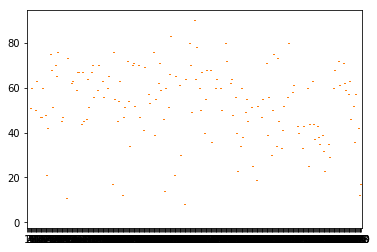

In [42]:
#dataset.boxplot(column = ['age'])
import matplotlib.pyplot as plt
plt.boxplot(dataset.iloc[:,0].values)

In [43]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 0)

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

from sklearn.metrics import accuracy_score

print("accuracy    ",accuracy_score(y_test,y_pred))

accuracy     1.0
